<a href="https://colab.research.google.com/github/AbiramiRathina/roi_based_program_selection/blob/abirami/project_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 5000) #Since we have alot of columns to analyse, setting this window to be higher than usual

# Dataset Description
*Dataset documentation: https://collegescorecard.ed.gov/data/data-documentation/*

*Dataset: https://collegescorecard.ed.gov/data/*

### Overview
In our project, we use two datasets: an institution-level dataset and a cohort (field-of-study)–level dataset. Combined, these data sources help us estimate the return on investment (ROI) of academic programs. Given a list of university choices, a student will be able to compare multiple programs based on ROI.

For simplicity, we restrict our analysis to data from the year 2025. Although we recognize that a fully informed decision requires examining trends across multiple years, the large dataset size and limitations in computational resources make multi-year analysis difficult. Therefore, we proceed with only the 2025 data. The first step in our project is to understand the structure and content of the data.

Since both datasets are large, instead of mounting Google Drive in Colab, we host them via public Google Drive links and load them directly. This approach saves time and ensures that the data is easily accessible to anyone running the project.

### Dataset 1: Institution-Level Data

This dataset contains information on approximately 6,429 institutions and 3,306 features. The data can be grouped into the following categories:

(i) Institutional Demographics

Institution name, location, control (public/private), sector

Campus type, degree levels offered

Admissions information, acceptance rates

Program offerings (CIP codes)

(ii) Cost & Affordability Indicators

Tuition and fees (in-state, out-of-state)

Net price after grants

Average annual cost by family income bracket

Cost of attendance and living expenses

(iii) Financial Aid & Debt

Percentage of students receiving Pell Grants

Average student loan amounts

Median debt at graduation

Repayment and default rates

(iv) Student Demographics

Enrollment numbers

Gender and race/ethnicity distributions

First-generation status

Part-time vs. full-time enrollment

(v) Academic Performance

Retention rates

Completion and graduation rates

Transfer-out and withdrawal rates

(vi) Earnings & Outcomes

Median earnings 1, 2, 6, and 10 years after entry

Employment rates

Loan repayment progress

Earnings by program or award level

Important notes:

Several fields contain NULL or privacy-suppressed values (e.g., “PrivacySuppressed”).

Some variables are only available for specific years.

Certain earnings metrics lag by several years due to tax data availability.

Proper interpretation requires understanding cohort definitions (e.g., first-time students, completers, non-completers).

### Dataset 2: Field-of-Study (Cohort-Level) Data

This dataset contains approximately 229,188 rows and 174 columns. Although the number of columns is smaller than in the institution dataset, the dimensionality remains significant. After reviewing the documentation, the following column groups help structure and understand the data:

(i) Identification & Keys

Institution-level identifiers
Program identifiers (CIP code, credential level)

(ii) Academic Program Information

Characteristics of the program or field of study

(iii) Student Count & Cohort Size

(iv) Cost & Tuition Information

(v) Debt, Loan & Repayment Metrics

(vi) Earnings & Employment Outcomes

(vii) Loan Repayment & Default Indicators

Useful for assessing program-level financial risk

(viii) Demographics

(ix) Program-level demographic details (gender, race, etc.)

(x) Institution Characteristics

Helpful when merging with the institution-level dataset

As with the institution data, this dataset contains many privacy-suppressed values (PS) and null or missing entries that require cleaning.

### EDA

#### Dataset 1: Institute level data

In [3]:
url_institutes = "https://drive.google.com/uc?export=download&id=1SIZufYNWCC91scwafSx3LYOAMEHyfvrr" # https://drive.google.com/file/d/1SIZufYNWCC91scwafSx3LYOAMEHyfvrr/view?usp=sharing"
df_institutes = pd.read_csv(url_institutes)

/tmp/ipython-input-1537099505.py:2: DtypeWarning: Columns (9,1407,1408,1431,1432,1532,1537,1538,1539,1540,1542,1546,1589,1601,1602,1606,1608,1611,1614,1615,1616,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1653,1679,1690,1692,1697,1700,1702,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df_institutes = pd.read_csv(url_institutes)


In [4]:
df_institutes

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,4
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0,5
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,4
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,49382201,4283601.0,42836.0,College Unbound - Newport/Aquidneck Island,Newport,RI,028400000,New England Commission on Higher Education,https://www.collegeunbound.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
6425,49425001,2609404.0,26094.0,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,443333631,Accrediting Commission of Career Schools and C...,https://www.valley.edu/,NaN,...,NaN,0.4651,26087.0,37545.0,NaN,NaN,28205.0,27499.0,NaN,15
6426,49501301,4247201.0,42472.0,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,85326-5705,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
6427,49501302,4247202.0,42472.0,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,85027-0000,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13


In [5]:
df_institutes.shape

(6429, 3306)

As we can see we have 6429 rows and 3306 columns, this is alot of features, for our problem statement information regarding the strength of the program(value it holds in terms of roi) is what trully matters

In [6]:
df_institutes.dtypes.unique()


array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

we can see tat we have both numeric and object datatypes, that means we will have to extract stats for each differently

First we'll describle information about the numeric columns

In [7]:
df_institutes.describe().T

,count,mean,std,min,25%,50%,75%,max
UNITID,6429.0,2.355496e+06,8.043861e+06,100654.000000,1.745700e+05,2.295400e+05,4.589550e+05,4.966450e+07
OPEID,6405.0,1.762653e+06,2.173129e+06,100200.000000,3.048000e+05,1.019817e+06,3.101900e+06,8.209882e+07
OPEID6,6405.0,1.714251e+04,1.533956e+04,1002.000000,3.037000e+03,1.019800e+04,3.098700e+04,4.309800e+04
SCH_DEG,5926.0,1.961019e+00,9.019431e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
HCM2,6429.0,5.599627e-03,7.462665e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
MAIN,6429.0,7.883030e-01,4.085429e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NUMBRANCH,6429.0,3.183699e+00,6.591915e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.200000e+01
PREDDEG,6429.0,1.823612e+00,1.086918e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
HIGHDEG,6429.0,2.247006e+00,1.388220e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00
CONTROL,6429.0,2.056618e+00,8.325397e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00


In [8]:
df_institutes.describe(include="object").T

,count,unique,top,freq
INSTNM,6429,6321,Cortiva Institute,6
CITY,6429,2362,New York,75
STABBR,6429,59,CA,672
ZIP,6429,5819,00961,6
ACCREDAGENCY,6225,40,Higher Learning Commission,1153
INSTURL,6415,5541,www.empire.edu/,71
NPCURL,5887,5085,www.empire.edu/net-price-calculator,69
DEATH_YR2_RT,6183,25,PS,5945
COMP_ORIG_YR2_RT,6183,3337,PS,1228
COMP_4YR_TRANS_YR2_RT,6183,938,PS,4659


In [9]:
df_institutes.nunique().sort_values(ascending=False)

,0
UNITID,6429
OPEID,6377
INSTNM,6321
LATITUDE,5874
LONGITUDE,5873
ADDR,5868
ZIP,5819
INSTURL,5541
FEDSCHCD,5419
TUITFTE,5204


we definately have a lot of data, that just cant be manually double checked

Possible steps to reduce thew number of features for numeric columns is to first drop columns with null values, then we can also drop columns that have only one unique value, we seem to have a few of those.

For categorical data we can observe that the top value for alot of columns is PS(meaning these are not disclosed for privacy reasons, that means we might have to drop these columns as they don't hold much value)

we also see that with regards to unique values we have multiple identifies for institues but the UNITID and INSTNM are enough identifiers. There also many columns that have 0-1 unique values, these dont add any value to our model

In [10]:
empty_cols = df_institutes.columns[df_institutes.isna().all()]
len(empty_cols)

75

In [11]:
constant_cols = df_institutes.columns[df_institutes.nunique(dropna=True) <= 1]
len(constant_cols)

193

In [12]:
obj_desc = df_institutes.describe(include='object').T
ps_cols = obj_desc[obj_desc['top'] == 'PS'].index.tolist()
len(ps_cols)

2319

In [13]:
bad_cols = set(empty_cols) | set(constant_cols) | set(ps_cols)
len(bad_cols)

2400

we have 2400 columns that can be removed

In [14]:
df_institutes_cleaned = df_institutes.drop(columns=list(bad_cols))
df_institutes_cleaned.shape


(6429, 906)

In [15]:
df_institutes.shape

(6429, 3306)

We have successfully reduced the number of featues from 3306 to 906

In [16]:
df_institutes_cleaned.nunique().sort_values(ascending=False)

,0
UNITID,6429
OPEID,6377
INSTNM,6321
LATITUDE,5874
LONGITUDE,5873
ADDR,5868
ZIP,5819
INSTURL,5541
FEDSCHCD,5419
TUITFTE,5204


From the abouve table we can see that there are some columns that provide too much information that might not be needed like:OPEID(Office of Postsecondary Education Identifier), LATITUDE, LONGITUDE, ADDT, ZIP, FEDSCHCD (A type of fedral aid code), INSTURL, TUITFTE, NPCURL, OPEID6

And some columns related to demografic information, that dont hold much value for our problem. We can remove these

Any column with cip in the begining again dont matter much here as these are course level completion rates, this is not required for our project

Columns tha have HH in it, are household information, again of very less value in our project context, eg: LN_MEDIAN_HH_INC

POOLYRS* columns only tell you how many years of data were pooled to calculate certain repayment variables. They are metadata, not features. They do not help with prediction and do not describe the institution or program. Examples of such columns:POOLYRS100, POOLYRS1, POOLYRS10, POOLYRS5

We can remove MTHCMP1 and similar columns (MTHCMP2 … MTHCMP6). These columns only describe the average months to complete the institution’s top programs, not the specific program you’re evaluating. They do not contribute to ROI modeling and mostly add noise, so dropping them is appropriate.

In [17]:
cols_to_remove_manual = [
    'OPEID', 'LATITUDE', 'LONGITUDE', 'ADDR', 'ZIP', 'FEDSCHCD',
    'INSTURL', 'TUITFTE', 'NPCURL', 'OPEID6'
]

df_institutes_cleaned = df_institutes_cleaned.drop(columns=[col for col in cols_to_remove_manual if col in df_institutes_cleaned.columns])


In [18]:
df_institutes_cleaned.shape

(6429, 896)

In [19]:
demographic_keywords = [
    "male", "female", "men", "women",
    "black", "white", "hisp", "asian",
    "race", "ethnic", "minority", "cip", "hh", "poolyrs", "mthcmp"
]

demographic_cols = [
    c for c in df_institutes_cleaned.columns
    if any(k in c.lower() for k in demographic_keywords)
]

print("Columns to remove:", demographic_cols)


Columns to remove: ['MENONLY', 'WOMENONLY', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54', 'CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC', 'CIP01CERT4', 'CIP01BACHL', 'CIP03CERT1', 'CIP03CERT2', 'CIP03ASSOC', 'CIP03CERT4', 'CIP03BACHL', 'CIP04CERT1', 'CIP04CERT2', 'CIP04ASSOC', 'CIP04CERT4', 'CIP04BACHL', 'CIP05CERT1', 'CIP05CERT2', 'CIP05ASSOC', 'CIP05CERT4', 'CIP05BACHL', 'CIP09CERT1', 'CIP09CERT2', 'CIP09ASSOC', 'CIP09CERT4', 'CIP09BACHL', 'CIP10CERT1', 'CIP10CERT2', 'CIP10ASSOC', 'CIP10CERT4', 'CIP10BACHL', 'CIP11CERT1', 'CIP11CERT2', 'CIP11ASSOC', 'CIP11CERT4', 'CIP11BACHL', 'CIP12CERT1', 'CIP12CERT2', 'CIP12ASSOC', 'CIP12CERT4', 'CIP12BACHL', 'CIP13CERT1', 'C

In [20]:
len(set(demographic_cols))

464

In [21]:
df_institutes_cleaned = df_institutes_cleaned.drop(columns=[col for col in demographic_cols if col in df_institutes_cleaned.columns])


In [22]:
df_institutes_cleaned.shape

(6429, 432)

In [23]:
df_institutes_cleaned.nunique().sort_values(ascending=False)

,0
UNITID,6429
INSTNM,6321
INEXPFTE,4932
MD_EARN_WNE_1YR,4116
MD_EARN_WNE_5YR,4072
PCTFLOAN_DCS_POOLED_SUPP,4045
MD_EARN_WNE_4YR,4028
PCT75_EARN_WNE_P6,4005
MD_EARN_WNE_P6,3986
PCT75_EARN_WNE_P8,3962


In [24]:
# Explore the df_inst
df_institutes_cleaned.columns.to_list()

['UNITID',
 'INSTNM',
 'CITY',
 'STABBR',
 'ACCREDAGENCY',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'DISTANCEONLY',
 'UGDS',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'PPTUG_EF',
 'CURROPER',
 'NPT4_PUB',
 'NPT4_PRIV',
 'NPT41_PUB',
 'NPT42_PUB',
 'NPT43_PUB',
 'NPT44_PUB',
 'NPT45_PUB',
 'NPT41_PRIV',
 'NPT42_PRIV',
 'NPT43_PRIV',
 'NPT44_PRIV',
 'NPT45_PRIV',
 'NPT4_048_PUB',
 'NPT4_048_PRIV',
 'NPT4_3075_PUB',
 'NPT4_3075_PRIV',
 'NPT4_75UP_PUB',
 'NPT4_7

Lets compute a few extra columns that encapsualte important information related to cost. finally lets pick only features that would help us predict roi

In [25]:
df_inst = df_institutes_cleaned.copy()

# TUITION_BASE:
# Use program tuition if available,
# otherwise use in-state tuition,
# otherwise use out-of-state tuition.
# Marc: can consider to replace by (TUITIONFEE_IN + TUITIONFEE_OUT) / 2 if both exists. If not, choose what it has.
df_inst["TUITION_BASE"] = (
    df_inst["TUITIONFEE_PROG"]
        .fillna(df_inst["TUITIONFEE_IN"])
        .fillna(df_inst["TUITIONFEE_OUT"])
)

# NET_PRICE:
# Private schools use NPT4_PRIV,
# if missing, fall back to NPT4_PUB.
# Marc: Makes sense, either private or pubic.
df_inst["NET_PRICE"] = (
    df_inst["NPT4_PRIV"]
        .fillna(df_inst["NPT4_PUB"])
)

# TOTAL_COST:
# Take NET_PRICE if available,
# else use TUITION_BASE,
# else 0.
# Then add room & board cost (or 0 if missing).
# Marc: Add the instructional expenditure for each full-time student
df_inst["TOTAL_COST"] = (
    df_inst["NET_PRICE"]
        .fillna(df_inst["TUITION_BASE"])
        .fillna(0) +
    df_inst["ROOMBOARD_ON"].fillna(0) + df_inst['INEXPFTE'].fillna(0)
)

roi_cols = [
    "UNITID", "INSTNM", "CONTROL", "TOTAL_COST"
]


df_inst = df_inst[[c for c in roi_cols if c in df_inst.columns]]


In [26]:
df_inst.isna().sum().sort_values(ascending=False)

,0
UNITID,0
INSTNM,0
CONTROL,0
TOTAL_COST,0


In [27]:
df_inst

,UNITID,INSTNM,CONTROL,TOTAL_COST
0,100654,Alabama A & M University,1,32259.0
1,100663,University of Alabama at Birmingham,1,48496.0
2,100690,Amridge University,2,5671.0
3,100706,University of Alabama in Huntsville,1,40463.0
4,100724,Alabama State University,1,32661.0
...,...,...,...,...
6424,49382201,College Unbound - Newport/Aquidneck Island,2,10488.0
6425,49425001,Valley College - Fairlawn - School of Nursing,3,18625.0
6426,49501301,Western Maricopa Education Center - Southwest ...,1,0.0
6427,49501302,Western Maricopa Education Center - Northeast ...,1,0.0


UNITID: Unique institution identifier assigned by the U.S. Department of Education (IPEDS).

INSTNM: Official name of the institution.

CONTROL: Type of institutional control (1 = Public, 2 = Private nonprofit, 3 = Private for-profit).

PREDDEG: Predominant degree level awarded by the institution (associate, bachelor’s, or graduate).

TOTAL_COST: Combined annual educational cost calculated from net price or tuition plus room and board.


In [28]:
df_institutes_cleaned_final = df_inst.copy()

In [29]:
df_institutes_cleaned_final.describe().T

,count,mean,std,min,25%,50%,75%,max
UNITID,6429.0,2.355496e+06,8.043861e+06,100654.0,174570.0,229540.0,458955.0,49664501.0
CONTROL,6429.0,2.056618e+00,8.325397e-01,1.0,1.0,2.0,3.0,3.0
TOTAL_COST,6429.0,2.828212e+04,2.098252e+04,0.0,15703.0,24636.0,36625.0,723521.0


In [30]:
df_institutes_cleaned_final.describe(include="object").T

,count,unique,top,freq
INSTNM,6429,6321,Cortiva Institute,6


In [31]:
df_institutes_cleaned_final.nunique().sort_values(ascending=False)

,0
UNITID,6429
INSTNM,6321
TOTAL_COST,5709
CONTROL,3


Now our institues, data looks almost perfect, but for now we are going to stop here, and not reduce the dimentions further, as we'll also have to extract important features from the cohort level information ,merge both tables and produce a final dataset where we will do a final feature selection to confirm the columns most useful

## Lets do the same thing for our cohorts dataset

In [32]:
url_cohorts = "https://drive.usercontent.google.com/download?id=1dkZwR3JDSTpH9j3oETqIO2L90WSHDgbT&export=download&confirm=t" #https://drive.google.com/file/d/1dkZwR3JDSTpH9j3oETqIO2L90WSHDgbT/view?usp=sharing
df_cohorts = pd.read_csv(url_cohorts)

In [33]:
df_cohorts

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_PELL_WNE_5YR,EARN_PELL_WNE_MDN_5YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,3.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,4.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229183,NaN,43006,Southeast New Mexico College,Public,1,5201,"Business/Commerce, General.",2,Associate's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229184,NaN,43006,Southeast New Mexico College,Public,1,5203,Accounting and Related Services.,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229185,NaN,43006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,1,Undergraduate Certificate or Diploma,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
229186,NaN,43006,Southeast New Mexico College,Public,1,5204,Business Operations Support and Assistant Serv...,2,Associate's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


Lets drop nan values

In [34]:
df_cohorts=df_cohorts.dropna()
# df_cohorts.columns.to_list()

In [35]:
df_cohorts.shape

(171410, 174)

So we have more rows and lesser columns this time, we'll have to reduce the dimentionality ti maybe 20 features first

In [36]:
df_cohorts.describe().T

,count,mean,std,min,25%,50%,75%,max
UNITID,171410.0,199684.860539,84132.109461,100654.0,148016.0,186371.0,219709.0,496371.0
OPEID6,171410.0,5805.593612,8172.313385,1002.0,1949.0,3009.0,4586.0,43006.0
MAIN,171410.0,0.948469,0.221080,0.0,1.0,1.0,1.0,1.0
CIPCODE,171410.0,3326.847634,1703.094246,100.0,1437.0,4005.0,5106.0,5401.0
CREDLEV,171410.0,3.243381,1.837564,1.0,2.0,3.0,5.0,8.0
IPEDSCOUNT1,171410.0,30.136404,100.750515,0.0,2.0,9.0,26.0,9082.0
IPEDSCOUNT2,171410.0,30.445995,105.566080,0.0,2.0,8.0,26.0,9606.0
DISTANCE,171410.0,1.258147,0.612038,1.0,1.0,1.0,1.0,3.0


Analysing the numeric columns is reletively easier compared to categorical features as they are less in number,

The UNITID is an important key as it will act as our foreign key mapping to UNITID in the institues table--> required

OPEID6 is not relevant in our case as it stands for Office of Postsecondary Education Identifier and this is not useful in our case-->not required

MAIN is a binary flag used to identify whether the campus is a main campus or a branch of the main campus/affiliated campus-->could be usefull

CIPCODE	is a numeric code assigned to a major can can be used along with the CIPDESC(name of the course) to identify majors-->we can remove this

CREDLEV tells you the type of degree earned for that program (certificate, associate, bachelor’s, master’s, or doctoral).-->we also have a CREDDESC which is a text description of the course, this is more easy for use to undersand, and we could get a similar encoding using one-hot latter while model building , hence for now we'll remove this

IPEDSCOUNT1: Number of students in the IPEDS Outcome Measures 8-year cohort (full-time, first-time undergraduates).

IPEDSCOUNT2: Number of students in the IPEDS Outcome Measures 8-year cohort (part-time, first-time undergraduates).

DISTANCE: Indicator for whether the institution primarily delivers education through distance (online) learning.--> not requied


Conclusion: lets remove OPEID6 and DISTANCE from our df_cohorts



In [37]:
df_cohorts = df_cohorts.drop(columns=["OPEID6", "DISTANCE", "CIPCODE", "CREDLEV"], errors="ignore")

In [38]:
df_cohorts.describe(include="object").T

,count,unique,top,freq
INSTNM,171410,5755,The Pennsylvania State University,450
CONTROL,171410,3,Public,107350
CIPDESC,171410,370,"Business Administration, Management and Operat...",5186
CREDDESC,171410,7,Bachelor's Degree,59375
DEBT_ALL_STGP_ANY_N,171410,859,PS,124190
DEBT_ALL_STGP_ANY_MEAN,171410,17573,PS,138880
DEBT_ALL_STGP_ANY_MDN,171410,11835,PS,134282
DEBT_ALL_STGP_EVAL_N,171410,874,PS,114947
DEBT_ALL_STGP_EVAL_MEAN,171410,24985,PS,128962
DEBT_ALL_STGP_EVAL_MDN,171410,15879,PS,127672


We see that alot of columns have the value PS, meaning private information that has'nt been disclosed, this might not be usefull in out case, but we can't completly remove them as we'll hance we must come up with a better solution

Lets first try to coun the number of non PS values and how they look like

In [39]:
is_ps = df_cohorts.isin(["PS"])
ps_counts = is_ps.sum()

total_rows = len(df_cohorts)

non_ps_counts = total_rows - ps_counts

dtypes = df_cohorts.dtypes

summary = pd.DataFrame({
    "dtype": dtypes,
    "total_rows": total_rows,
    "ps_count": ps_counts,
    "non_ps_count": non_ps_counts
})

summary.sort_values("ps_count", ascending=False)

,dtype,total_rows,ps_count,non_ps_count
DEBT_MALE_PP_EVAL_MDN,object,171410,169886,1524
DEBT_NOTMALE_PP_EVAL_MDN,object,171410,169886,1524
EARN_COUNT_HIGH_CRED_1YR,object,171410,169711,1699
DEBT_MALE_PP_ANY_MDN,object,171410,169431,1979
DEBT_NOTMALE_PP_ANY_MDN,object,171410,169431,1979
DEBT_NOPELL_PP_EVAL_MDN,object,171410,168974,2436
DEBT_PELL_PP_EVAL_MDN,object,171410,168974,2436
DEBT_MALE_PP_EVAL_MEAN,object,171410,168719,2691
DEBT_NOTMALE_PP_EVAL_MEAN,object,171410,168685,2725
DEBT_NOPELL_PP_ANY_MDN,object,171410,168254,3156


Now we have aorund 200k rows but for our project we need min of 50k rows, we see that for some cols the number of non PS values are cloese to this 50k range, lets filter them

Our goal is to use features related to debt, earnings and other related features that can help predict roi of a course


Lets try to manually pick out the cols that have more than 50k non_ps values, and check the size of the data

In [40]:
df_cohorts
df_cohorts.columns.to_list()

['UNITID',
 'INSTNM',
 'CONTROL',
 'MAIN',
 'CIPDESC',
 'CREDDESC',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'DEBT_ALL_STGP_ANY_N',
 'DEBT_ALL_STGP_ANY_MEAN',
 'DEBT_ALL_STGP_ANY_MDN',
 'DEBT_ALL_STGP_EVAL_N',
 'DEBT_ALL_STGP_EVAL_MEAN',
 'DEBT_ALL_STGP_EVAL_MDN',
 'DEBT_ALL_PP_ANY_N',
 'DEBT_ALL_PP_ANY_MEAN',
 'DEBT_ALL_PP_ANY_MDN',
 'DEBT_ALL_PP_EVAL_N',
 'DEBT_ALL_PP_EVAL_MEAN',
 'DEBT_ALL_PP_EVAL_MDN',
 'DEBT_MALE_STGP_ANY_N',
 'DEBT_MALE_STGP_ANY_MEAN',
 'DEBT_MALE_STGP_ANY_MDN',
 'DEBT_MALE_STGP_EVAL_N',
 'DEBT_MALE_STGP_EVAL_MEAN',
 'DEBT_MALE_STGP_EVAL_MDN',
 'DEBT_MALE_PP_ANY_N',
 'DEBT_MALE_PP_ANY_MEAN',
 'DEBT_MALE_PP_ANY_MDN',
 'DEBT_MALE_PP_EVAL_N',
 'DEBT_MALE_PP_EVAL_MEAN',
 'DEBT_MALE_PP_EVAL_MDN',
 'DEBT_NOTMALE_STGP_ANY_N',
 'DEBT_NOTMALE_STGP_ANY_MEAN',
 'DEBT_NOTMALE_STGP_ANY_MDN',
 'DEBT_NOTMALE_STGP_EVAL_N',
 'DEBT_NOTMALE_STGP_EVAL_MEAN',
 'DEBT_NOTMALE_STGP_EVAL_MDN',
 'DEBT_NOTMALE_PP_ANY_N',
 'DEBT_NOTMALE_PP_ANY_MEAN',
 'DEBT_NOTMALE_PP_ANY_MDN',
 'DEBT_NOTMALE_PP_EV

In [41]:
cols_to_extract = [
    "UNITID",
    "INSTNM",
    "IPEDSCOUNT1",
    "CIPDESC",
    "IPEDSCOUNT2",
    "CREDDESC",
    "CONTROL",
    "MAIN",
    "EARN_COUNT_NWNE_1YR",
    "EARN_COUNT_NWNE_HI_1YR",
    "EARN_COUNT_NWNE_5YR",
    "EARN_COUNT_NWNE_4YR",
    "BBRR1_FED_COMP_N",
    "DEBT_ALL_STGP_EVAL_N",
    "BBRR2_FED_COMP_N",
    "BBRR4_FED_COMP_N",
    "BBRR3_FED_COMP_N",
    "EARN_CNTOVER150_HI_2YR",
    "EARN_COUNT_WNE_HI_2YR",
    "EARN_COUNT_NWNE_HI_2YR",
    "EARN_MDN_HI_2YR"
]

df_cohort_manual = df_cohorts[cols_to_extract]

In [42]:
df_cohort_manual

,UNITID,INSTNM,IPEDSCOUNT1,CIPDESC,IPEDSCOUNT2,CREDDESC,CONTROL,MAIN,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_HI_1YR,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
2,100654.0,Alabama A & M University,3.0,Animal Sciences.,9.0,Bachelor's Degree,Public,1,0,1,...,2,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,Alabama A & M University,7.0,Food Science and Technology.,10.0,Bachelor's Degree,Public,1,0,0,...,0,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,Alabama A & M University,4.0,Food Science and Technology.,6.0,Master's Degree,Public,1,1,0,...,0,PS,PS,15,12,12,PS,PS,PS,PS
5,100654.0,Alabama A & M University,2.0,Food Science and Technology.,4.0,Doctoral Degree,Public,1,PS,PS,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
7,100654.0,Alabama A & M University,6.0,"Agriculture, Agriculture Operations, and Relat...",6.0,Bachelor's Degree,Public,1,0,1,...,1,PS,PS,PS,PS,PS,PS,PS,PS,PS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218846,496283.0,Provo College-Idaho Falls Campus,0.0,"Registered Nursing, Nursing Administration, Nu...",0.0,Bachelor's Degree,"Private, for-profit",0,4,0,...,PS,107,PS,11,PS,PS,PS,PS,PS,PS
218849,496292.0,Miller-Motte College-Chattanooga 2,0.0,Ground Transportation.,47.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,59,6,...,8,PS,18,PS,PS,PS,32,43,8,30988
218850,496326.0,Eagle Gate College-Boise Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,2,5,...,7,48,PS,117,97,96,12,17,2,25658
218851,496326.0,Eagle Gate College-Boise Campus,0.0,"Registered Nursing, Nursing Administration, Nu...",0.0,Bachelor's Degree,"Private, for-profit",0,1,0,...,0,100,108,11,PS,PS,PS,PS,PS,PS


lets drop rows with ps in it

In [43]:
df_cohort_manual_non_ps = df_cohort_manual[~df_cohort_manual.isin(["PS"]).any(axis=1)]


In [44]:
df_cohort_manual_non_ps

,UNITID,INSTNM,IPEDSCOUNT1,CIPDESC,IPEDSCOUNT2,CREDDESC,CONTROL,MAIN,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_HI_1YR,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
15,100654.0,Alabama A & M University,23.0,Audiovisual Communications Technologies/Techni...,16.0,Bachelor's Degree,Public,1,1,1,...,0,48,45,18,16,16,6,12,0,20102
16,100654.0,Alabama A & M University,20.0,"Computer and Information Sciences, General.",37.0,Bachelor's Degree,Public,1,0,1,...,0,46,41,26,29,29,29,31,0,52107
28,100654.0,Alabama A & M University,18.0,Civil Engineering.,7.0,Bachelor's Degree,Public,1,0,0,...,0,10,12,12,15,15,12,12,0,47260
29,100654.0,Alabama A & M University,33.0,"Electrical, Electronics and Communications Eng...",20.0,Bachelor's Degree,Public,1,1,0,...,4,43,50,23,22,22,28,29,2,61303
30,100654.0,Alabama A & M University,41.0,Mechanical Engineering.,41.0,Bachelor's Degree,Public,1,2,1,...,2,39,53,23,26,26,19,23,0,52107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218828,495998.0,San Joaquin Valley College-Porterville,82.0,Allied Health and Medical Assisting Services.,57.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,190,99,...,112,2097,2325,1311,1098,1090,491,797,84,21861
218829,495998.0,San Joaquin Valley College-Porterville,19.0,Business Operations Support and Assistant Serv...,11.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,29,6,...,17,258,306,135,113,113,36,60,11,22094
218844,496265.0,Triangle Tech-Chambersburg,0.0,Precision Metal Working.,1.0,Associate's Degree,"Private, for-profit",0,4,2,...,7,25,20,33,54,54,35,50,5,30409
218845,496283.0,Provo College-Idaho Falls Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,0,4,...,3,30,22,55,35,35,9,13,0,23456


This is giving us only 36k rows, that means there are some rows, where there is only one PS value and the others are available, lets loosen this condition a bit and remove only rows that have more than 4 ps values

In [45]:
ps_count_per_row = df_cohort_manual.isin(["PS"]).sum(axis=1)

df_cohort_filtered = df_cohort_manual[ps_count_per_row <= 4]

In [46]:
df_cohort_filtered

,UNITID,INSTNM,IPEDSCOUNT1,CIPDESC,IPEDSCOUNT2,CREDDESC,CONTROL,MAIN,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_HI_1YR,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
12,100654.0,Alabama A & M University,8.0,"City/Urban, Community and Regional Planning.",6.0,Master's Degree,Public,1,0,1,...,0,PS,PS,PS,10,10,12,12,0,47260
15,100654.0,Alabama A & M University,23.0,Audiovisual Communications Technologies/Techni...,16.0,Bachelor's Degree,Public,1,1,1,...,0,48,45,18,16,16,6,12,0,20102
16,100654.0,Alabama A & M University,20.0,"Computer and Information Sciences, General.",37.0,Bachelor's Degree,Public,1,0,1,...,0,46,41,26,29,29,29,31,0,52107
17,100654.0,Alabama A & M University,9.0,"Computer and Information Sciences, General.",7.0,Master's Degree,Public,1,1,1,...,0,10,11,13,12,12,PS,PS,PS,PS
20,100654.0,Alabama A & M University,1.0,Educational Administration and Supervision.,1.0,Master's Degree,Public,1,0,0,...,2,PS,PS,15,20,20,8,11,0,50231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218844,496265.0,Triangle Tech-Chambersburg,0.0,Precision Metal Working.,1.0,Associate's Degree,"Private, for-profit",0,4,2,...,7,25,20,33,54,54,35,50,5,30409
218845,496283.0,Provo College-Idaho Falls Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,0,4,...,3,30,22,55,35,35,9,13,0,23456
218849,496292.0,Miller-Motte College-Chattanooga 2,0.0,Ground Transportation.,47.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,59,6,...,8,PS,18,PS,PS,PS,32,43,8,30988
218850,496326.0,Eagle Gate College-Boise Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",0,2,5,...,7,48,PS,117,97,96,12,17,2,25658


This looks good enough, lets now impute missing PS values using SimpleImputed

In [47]:
df_cohort_filtered = df_cohort_filtered.replace(["PS"], np.nan) #sub PS values with nan

Since imputation must be done seperately for numeric and cat cols lets seperate them

In [48]:
numeric_cols = df_cohort_filtered.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cohort_filtered.select_dtypes(exclude=[np.number]).columns.tolist()

In [49]:
num_imputer = SimpleImputer(strategy="median")
df_cohort_filtered[numeric_cols] = num_imputer.fit_transform(df_cohort_filtered[numeric_cols])

In [50]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df_cohort_filtered[categorical_cols] = cat_imputer.fit_transform(df_cohort_filtered[categorical_cols])

Lets try another method to do this, we will use a kind of thresholding to strike a balance between the number of rows after removing columns with non_ps values above a threshold, our goal is to reduce the number of rows but not as many columns, because our data is spread across

Lets come up with a logic that finds the exact threshold in 100 increments where the final df after filetring is more than 50k rows, we want to keep maximum number of columns, so the threshold should be small enough to strike a balance between these two

In [51]:
start_threshold = 50000
end_threshold = 100000
threshold=start_threshold

for threshold in range(start_threshold, end_threshold + 1, 100):
  cols_to_keep = summary[summary["non_ps_count"] >= threshold].index.tolist()
  df_thresh = df_cohorts[cols_to_keep]
  df_thresh_non_ps = df_thresh[
    ~df_thresh.isin(["PS"]).any(axis=1)]
  if len(df_thresh_non_ps) >= 50000:
    break

In [52]:
threshold

56500

In [53]:
cols_to_keep

['UNITID',
 'INSTNM',
 'CONTROL',
 'MAIN',
 'CIPDESC',
 'CREDDESC',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'EARN_COUNT_NWNE_HI_1YR',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_4YR',
 'BBRR1_FED_COMP_N',
 'EARN_COUNT_NWNE_5YR']

In [54]:
df_thresh_non_ps

,UNITID,INSTNM,CONTROL,MAIN,CIPDESC,CREDDESC,IPEDSCOUNT1,IPEDSCOUNT2,EARN_COUNT_NWNE_HI_1YR,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,EARN_COUNT_NWNE_5YR
10,100654.0,Alabama A & M University,Public,1,Forestry.,Bachelor's Degree,5.0,4.0,0,1,0,11,1
15,100654.0,Alabama A & M University,Public,1,Audiovisual Communications Technologies/Techni...,Bachelor's Degree,23.0,16.0,1,1,0,48,0
16,100654.0,Alabama A & M University,Public,1,"Computer and Information Sciences, General.",Bachelor's Degree,20.0,37.0,1,0,0,46,2
17,100654.0,Alabama A & M University,Public,1,"Computer and Information Sciences, General.",Master's Degree,9.0,7.0,1,1,0,10,1
21,100654.0,Alabama A & M University,Public,1,Special Education and Teaching.,Bachelor's Degree,18.0,12.0,0,2,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218844,496265.0,Triangle Tech-Chambersburg,"Private, for-profit",0,Precision Metal Working.,Associate's Degree,0.0,1.0,2,4,7,25,10
218845,496283.0,Provo College-Idaho Falls Campus,"Private, for-profit",0,Allied Health and Medical Assisting Services.,Undergraduate Certificate or Diploma,0.0,4.0,4,0,3,30,3
218850,496326.0,Eagle Gate College-Boise Campus,"Private, for-profit",0,Allied Health and Medical Assisting Services.,Undergraduate Certificate or Diploma,0.0,4.0,5,2,7,48,13
218851,496326.0,Eagle Gate College-Boise Campus,"Private, for-profit",0,"Registered Nursing, Nursing Administration, Nu...",Bachelor's Degree,0.0,0.0,0,1,0,100,0


Lets compare the two methods and see which one is better
df_cohort_filtered vs df_thresh_non_ps

In [55]:
df_cohort_filtered.shape

(51299, 21)

In [56]:
df_thresh_non_ps.shape

(53447, 13)

In [57]:
manual_cols = set(df_cohort_filtered.columns)

In [58]:
thresh_cols = set(df_thresh_non_ps.columns)

In [59]:
manual_cols.intersection(thresh_cols) # common cols

{'BBRR1_FED_COMP_N',
 'CIPDESC',
 'CONTROL',
 'CREDDESC',
 'EARN_COUNT_NWNE_1YR',
 'EARN_COUNT_NWNE_4YR',
 'EARN_COUNT_NWNE_5YR',
 'EARN_COUNT_NWNE_HI_1YR',
 'INSTNM',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'MAIN',
 'UNITID'}

In [60]:
manual_cols.difference(thresh_cols) # cols in manual not in thresh

{'BBRR2_FED_COMP_N',
 'BBRR3_FED_COMP_N',
 'BBRR4_FED_COMP_N',
 'DEBT_ALL_STGP_EVAL_N',
 'EARN_CNTOVER150_HI_2YR',
 'EARN_COUNT_NWNE_HI_2YR',
 'EARN_COUNT_WNE_HI_2YR',
 'EARN_MDN_HI_2YR'}

In [61]:
thresh_cols.difference(manual_cols) # cols in thresh not in manual

set()

Clearly our manual cols gives more information than threshold df, lets proceed with out manually selected and filtered df

In [62]:
df_merged = pd.merge(df_institutes_cleaned_final, df_cohort_filtered, on="UNITID", how="inner")

In [63]:
df_merged

,UNITID,INSTNM_x,CONTROL_x,TOTAL_COST,INSTNM_y,IPEDSCOUNT1,CIPDESC,IPEDSCOUNT2,CREDDESC,CONTROL_y,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
0,100654,Alabama A & M University,1,32259.0,Alabama A & M University,8.0,"City/Urban, Community and Regional Planning.",6.0,Master's Degree,Public,...,0,14,14,16,10,10,12,12,0,47260
1,100654,Alabama A & M University,1,32259.0,Alabama A & M University,23.0,Audiovisual Communications Technologies/Techni...,16.0,Bachelor's Degree,Public,...,0,48,45,18,16,16,6,12,0,20102
2,100654,Alabama A & M University,1,32259.0,Alabama A & M University,20.0,"Computer and Information Sciences, General.",37.0,Bachelor's Degree,Public,...,0,46,41,26,29,29,29,31,0,52107
3,100654,Alabama A & M University,1,32259.0,Alabama A & M University,9.0,"Computer and Information Sciences, General.",7.0,Master's Degree,Public,...,0,10,11,13,12,12,12,11,0,29685
4,100654,Alabama A & M University,1,32259.0,Alabama A & M University,1.0,Educational Administration and Supervision.,1.0,Master's Degree,Public,...,2,14,14,15,20,20,8,11,0,50231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50223,495998,San Joaquin Valley College-Porterville,3,29747.0,San Joaquin Valley College-Porterville,19.0,Business Operations Support and Assistant Serv...,11.0,Undergraduate Certificate or Diploma,"Private, for-profit",...,17,258,306,135,113,113,36,60,11,22094
50224,496265,Triangle Tech-Chambersburg,3,29723.0,Triangle Tech-Chambersburg,0.0,Precision Metal Working.,1.0,Associate's Degree,"Private, for-profit",...,7,25,20,33,54,54,35,50,5,30409
50225,496283,Provo College-Idaho Falls Campus,3,37177.0,Provo College-Idaho Falls Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",...,3,30,22,55,35,35,9,13,0,23456
50226,496326,Eagle Gate College-Boise Campus,3,34528.0,Eagle Gate College-Boise Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",...,7,48,14,117,97,96,12,17,2,25658


In [64]:
df_merged.isna().sum().sort_values(ascending=False)

,0
UNITID,0
INSTNM_x,0
CONTROL_x,0
TOTAL_COST,0
INSTNM_y,0
IPEDSCOUNT1,0
CIPDESC,0
IPEDSCOUNT2,0
CREDDESC,0
CONTROL_y,0


In [65]:
df_merged_clean = df_merged.dropna()
df_merged_clean

,UNITID,INSTNM_x,CONTROL_x,TOTAL_COST,INSTNM_y,IPEDSCOUNT1,CIPDESC,IPEDSCOUNT2,CREDDESC,CONTROL_y,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
0,100654,Alabama A & M University,1,32259.0,Alabama A & M University,8.0,"City/Urban, Community and Regional Planning.",6.0,Master's Degree,Public,...,0,14,14,16,10,10,12,12,0,47260
1,100654,Alabama A & M University,1,32259.0,Alabama A & M University,23.0,Audiovisual Communications Technologies/Techni...,16.0,Bachelor's Degree,Public,...,0,48,45,18,16,16,6,12,0,20102
2,100654,Alabama A & M University,1,32259.0,Alabama A & M University,20.0,"Computer and Information Sciences, General.",37.0,Bachelor's Degree,Public,...,0,46,41,26,29,29,29,31,0,52107
3,100654,Alabama A & M University,1,32259.0,Alabama A & M University,9.0,"Computer and Information Sciences, General.",7.0,Master's Degree,Public,...,0,10,11,13,12,12,12,11,0,29685
4,100654,Alabama A & M University,1,32259.0,Alabama A & M University,1.0,Educational Administration and Supervision.,1.0,Master's Degree,Public,...,2,14,14,15,20,20,8,11,0,50231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50223,495998,San Joaquin Valley College-Porterville,3,29747.0,San Joaquin Valley College-Porterville,19.0,Business Operations Support and Assistant Serv...,11.0,Undergraduate Certificate or Diploma,"Private, for-profit",...,17,258,306,135,113,113,36,60,11,22094
50224,496265,Triangle Tech-Chambersburg,3,29723.0,Triangle Tech-Chambersburg,0.0,Precision Metal Working.,1.0,Associate's Degree,"Private, for-profit",...,7,25,20,33,54,54,35,50,5,30409
50225,496283,Provo College-Idaho Falls Campus,3,37177.0,Provo College-Idaho Falls Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",...,3,30,22,55,35,35,9,13,0,23456
50226,496326,Eagle Gate College-Boise Campus,3,34528.0,Eagle Gate College-Boise Campus,0.0,Allied Health and Medical Assisting Services.,4.0,Undergraduate Certificate or Diploma,"Private, for-profit",...,7,48,14,117,97,96,12,17,2,25658


Lets drop INSTNM_y and CONTROL_y, and keep only the values that come from the institues df and rename the _x columns

In [66]:
cols_to_drop = ["INSTNM_y", "CONTROL_y"]

df_merged_clean = df_merged_clean.drop(columns=cols_to_drop)
df_merged_clean = df_merged_clean.rename(columns={
    "INSTNM_x": "INSTNM",
    "CONTROL_x": "CONTROL"
})


In [67]:
df_merged_clean.head()

,UNITID,INSTNM,CONTROL,TOTAL_COST,IPEDSCOUNT1,CIPDESC,IPEDSCOUNT2,CREDDESC,MAIN,EARN_COUNT_NWNE_1YR,...,EARN_COUNT_NWNE_4YR,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR
0,100654,Alabama A & M University,1,32259.0,8.0,"City/Urban, Community and Regional Planning.",6.0,Master's Degree,1.0,0,...,0,14,14,16,10,10,12,12,0,47260
1,100654,Alabama A & M University,1,32259.0,23.0,Audiovisual Communications Technologies/Techni...,16.0,Bachelor's Degree,1.0,1,...,0,48,45,18,16,16,6,12,0,20102
2,100654,Alabama A & M University,1,32259.0,20.0,"Computer and Information Sciences, General.",37.0,Bachelor's Degree,1.0,0,...,0,46,41,26,29,29,29,31,0,52107
3,100654,Alabama A & M University,1,32259.0,9.0,"Computer and Information Sciences, General.",7.0,Master's Degree,1.0,1,...,0,10,11,13,12,12,12,11,0,29685
4,100654,Alabama A & M University,1,32259.0,1.0,Educational Administration and Supervision.,1.0,Master's Degree,1.0,0,...,2,14,14,15,20,20,8,11,0,50231


In [68]:
df_merged_clean.columns

Index(['UNITID', 'INSTNM', 'CONTROL', 'TOTAL_COST', 'IPEDSCOUNT1', 'CIPDESC',
       'IPEDSCOUNT2', 'CREDDESC', 'MAIN', 'EARN_COUNT_NWNE_1YR',
       'EARN_COUNT_NWNE_HI_1YR', 'EARN_COUNT_NWNE_5YR', 'EARN_COUNT_NWNE_4YR',
       'BBRR1_FED_COMP_N', 'DEBT_ALL_STGP_EVAL_N', 'BBRR2_FED_COMP_N',
       'BBRR4_FED_COMP_N', 'BBRR3_FED_COMP_N', 'EARN_CNTOVER150_HI_2YR',
       'EARN_COUNT_WNE_HI_2YR', 'EARN_COUNT_NWNE_HI_2YR', 'EARN_MDN_HI_2YR'],
      dtype='object')

Here's the description of the final 22 columns

UNITID: Unique institutional identifier assigned by the U.S. Department of Education (IPEDS).

INSTNM: Official name of the institution.

CONTROL: Type of institutional control (1 = Public, 2 = Private nonprofit, 3 = Private for-profit).

TOTAL_COST: Estimated total annual educational cost (net price or tuition plus room and board).(we computed this value as a summation of other fee vcolumns for easy interpretation)

IPEDSCOUNT1: Number of full-time, first-time students in the IPEDS 8-year outcome cohort.

CIPDESC: Text description of the academic program’s CIP (Classification of Instructional Programs) field.

IPEDSCOUNT2: Number of part-time, first-time students in the IPEDS 8-year outcome cohort.

CREDDESC: Text description of the credential level (certificate, associate, bachelor’s, master’s, etc.).

MAIN: Indicates whether the institution is the main campus (1 = main, 0 = branch campus).

EARN_COUNT_NWNE_1YR: Number of graduates not working and not enrolled one year after completion.

EARN_COUNT_NWNE_HI_1YR: Number of high-income–background graduates not working and not enrolled one year after completion.

EARN_COUNT_NWNE_5YR: Number of graduates not working and not enrolled five years after completion.

EARN_COUNT_NWNE_4YR: Number of graduates not working and not enrolled four years after completion.

BBRR1_FED_COMP_N: Number of program completers with federal loans included in the 1-year repayment rate.

DEBT_ALL_STGP_EVAL_N: Number of students included in the evaluation of all student loan debt metrics.

BBRR2_FED_COMP_N: Number of program completers with federal loans in the 2-year borrower-based repayment rate.

BBRR4_FED_COMP_N: Number of program completers with federal loans in the 4-year borrower-based repayment rate.

BBRR3_FED_COMP_N: Number of program completers with federal loans in the 3-year borrower-based repayment rate.

EARN_CNTOVER150_HI_2YR: Count of high-income graduates earning over $150,000 two years after completion.

EARN_COUNT_WNE_HI_2YR: Count of high-income graduates who are working and not enrolled two years after completion.

EARN_COUNT_NWNE_HI_2YR: Count of high-income graduates not working and not enrolled two years after completion.

EARN_MDN_HI_2YR: Median earnings of high-income graduates two years after completing the program.


In [69]:
# Do the correlation analysis to drop highly relevant variables
df_merged_clean_num = df_merged_clean.select_dtypes(include=['int','float'])
df_merged_clean_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50228 entries, 0 to 50227
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UNITID       50228 non-null  int64  
 1   CONTROL      50228 non-null  int64  
 2   TOTAL_COST   50228 non-null  float64
 3   IPEDSCOUNT1  50228 non-null  float64
 4   IPEDSCOUNT2  50228 non-null  float64
 5   MAIN         50228 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 2.3 MB


<Axes: >

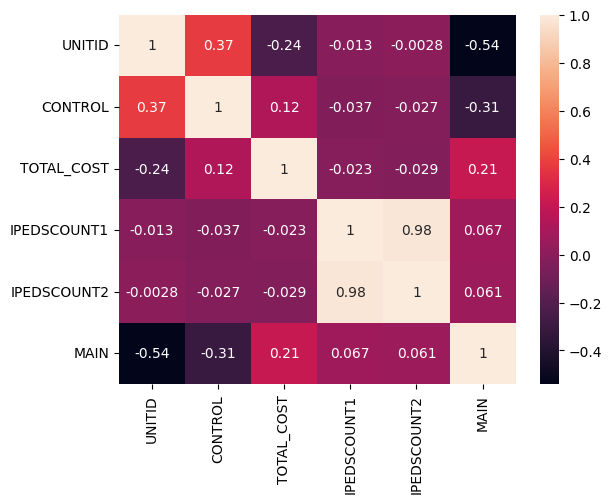

In [70]:
corr_matrix = df_merged_clean_num.corr()
sns.heatmap(corr_matrix,annot=True)

In [71]:
# We drop the columns with high colinearity, eg. IPEDSCOUNT1 and IPEDSCOUNT2 (0.98)
df_merged_clean = df_merged_clean.drop(columns=['IPEDSCOUNT2'])

From the descriptions we have enough information to create a new column called roi that would be EARN_MDN_HI_2YR-TOTAL_COST

In [72]:
df_merged_clean["EARN_MDN_HI_2YR"] = pd.to_numeric(df_merged_clean["EARN_MDN_HI_2YR"], errors="coerce")
df_merged_clean["TOTAL_COST"] = pd.to_numeric(df_merged_clean["TOTAL_COST"], errors="coerce")

In [73]:
df_merged_clean["ROI"] = df_merged_clean["EARN_MDN_HI_2YR"] - df_merged_clean["TOTAL_COST"]

# We should also consider to make the string things to have levels like associate -> bachelor -> master


In [74]:
df_merged_clean

,UNITID,INSTNM,CONTROL,TOTAL_COST,IPEDSCOUNT1,CIPDESC,CREDDESC,MAIN,EARN_COUNT_NWNE_1YR,EARN_COUNT_NWNE_HI_1YR,...,BBRR1_FED_COMP_N,DEBT_ALL_STGP_EVAL_N,BBRR2_FED_COMP_N,BBRR4_FED_COMP_N,BBRR3_FED_COMP_N,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_COUNT_NWNE_HI_2YR,EARN_MDN_HI_2YR,ROI
0,100654,Alabama A & M University,1,32259.0,8.0,"City/Urban, Community and Regional Planning.",Master's Degree,1.0,0,1,...,14,14,16,10,10,12,12,0,47260,15001.0
1,100654,Alabama A & M University,1,32259.0,23.0,Audiovisual Communications Technologies/Techni...,Bachelor's Degree,1.0,1,1,...,48,45,18,16,16,6,12,0,20102,-12157.0
2,100654,Alabama A & M University,1,32259.0,20.0,"Computer and Information Sciences, General.",Bachelor's Degree,1.0,0,1,...,46,41,26,29,29,29,31,0,52107,19848.0
3,100654,Alabama A & M University,1,32259.0,9.0,"Computer and Information Sciences, General.",Master's Degree,1.0,1,1,...,10,11,13,12,12,12,11,0,29685,-2574.0
4,100654,Alabama A & M University,1,32259.0,1.0,Educational Administration and Supervision.,Master's Degree,1.0,0,0,...,14,14,15,20,20,8,11,0,50231,17972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50223,495998,San Joaquin Valley College-Porterville,3,29747.0,19.0,Business Operations Support and Assistant Serv...,Undergraduate Certificate or Diploma,0.0,29,6,...,258,306,135,113,113,36,60,11,22094,-7653.0
50224,496265,Triangle Tech-Chambersburg,3,29723.0,0.0,Precision Metal Working.,Associate's Degree,0.0,4,2,...,25,20,33,54,54,35,50,5,30409,686.0
50225,496283,Provo College-Idaho Falls Campus,3,37177.0,0.0,Allied Health and Medical Assisting Services.,Undergraduate Certificate or Diploma,0.0,0,4,...,30,22,55,35,35,9,13,0,23456,-13721.0
50226,496326,Eagle Gate College-Boise Campus,3,34528.0,0.0,Allied Health and Medical Assisting Services.,Undergraduate Certificate or Diploma,0.0,2,5,...,48,14,117,97,96,12,17,2,25658,-8870.0


Now we have enough information to use roi as a regression outcome parameter

In [75]:
# Data preparation
data = df_merged_clean.drop(columns=['ROI','INSTNM','CIPDESC','CREDDESC','EARN_MDN_HI_2YR'])
data[['EARN_COUNT_NWNE_1YR','EARN_COUNT_NWNE_HI_1YR','EARN_COUNT_NWNE_5YR','EARN_COUNT_NWNE_4YR','BBRR1_FED_COMP_N','DEBT_ALL_STGP_EVAL_N','BBRR2_FED_COMP_N','BBRR4_FED_COMP_N','BBRR3_FED_COMP_N','EARN_CNTOVER150_HI_2YR','EARN_COUNT_WNE_HI_2YR','EARN_COUNT_NWNE_HI_2YR']] = data[['EARN_COUNT_NWNE_1YR','EARN_COUNT_NWNE_HI_1YR','EARN_COUNT_NWNE_5YR','EARN_COUNT_NWNE_4YR','BBRR1_FED_COMP_N','DEBT_ALL_STGP_EVAL_N','BBRR2_FED_COMP_N','BBRR4_FED_COMP_N','BBRR3_FED_COMP_N','EARN_CNTOVER150_HI_2YR','EARN_COUNT_WNE_HI_2YR','EARN_COUNT_NWNE_HI_2YR']].astype(int)
target = df_merged_clean['ROI']
y = target
X = data

In [76]:
# Train test sets split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scalar = StandardScaler()
X2_train = scalar.fit_transform(X_train)
X2_test = scalar.transform(X_test)
# pca = PCA(n_components=0.95)
# X3_train = pca.fit_transform(X2_train)
# X3_test = pca.transform(X2_test)

In [77]:
X_train.select_dtypes(include=['object'])

""
11893
22776
48272
3186
820
...
21243
45891
42613
43567


Score:  0.5174628198598635
MAE:  12978.036055587681
MSE:  329046070.6746655
RMSE:  18139.627082017578


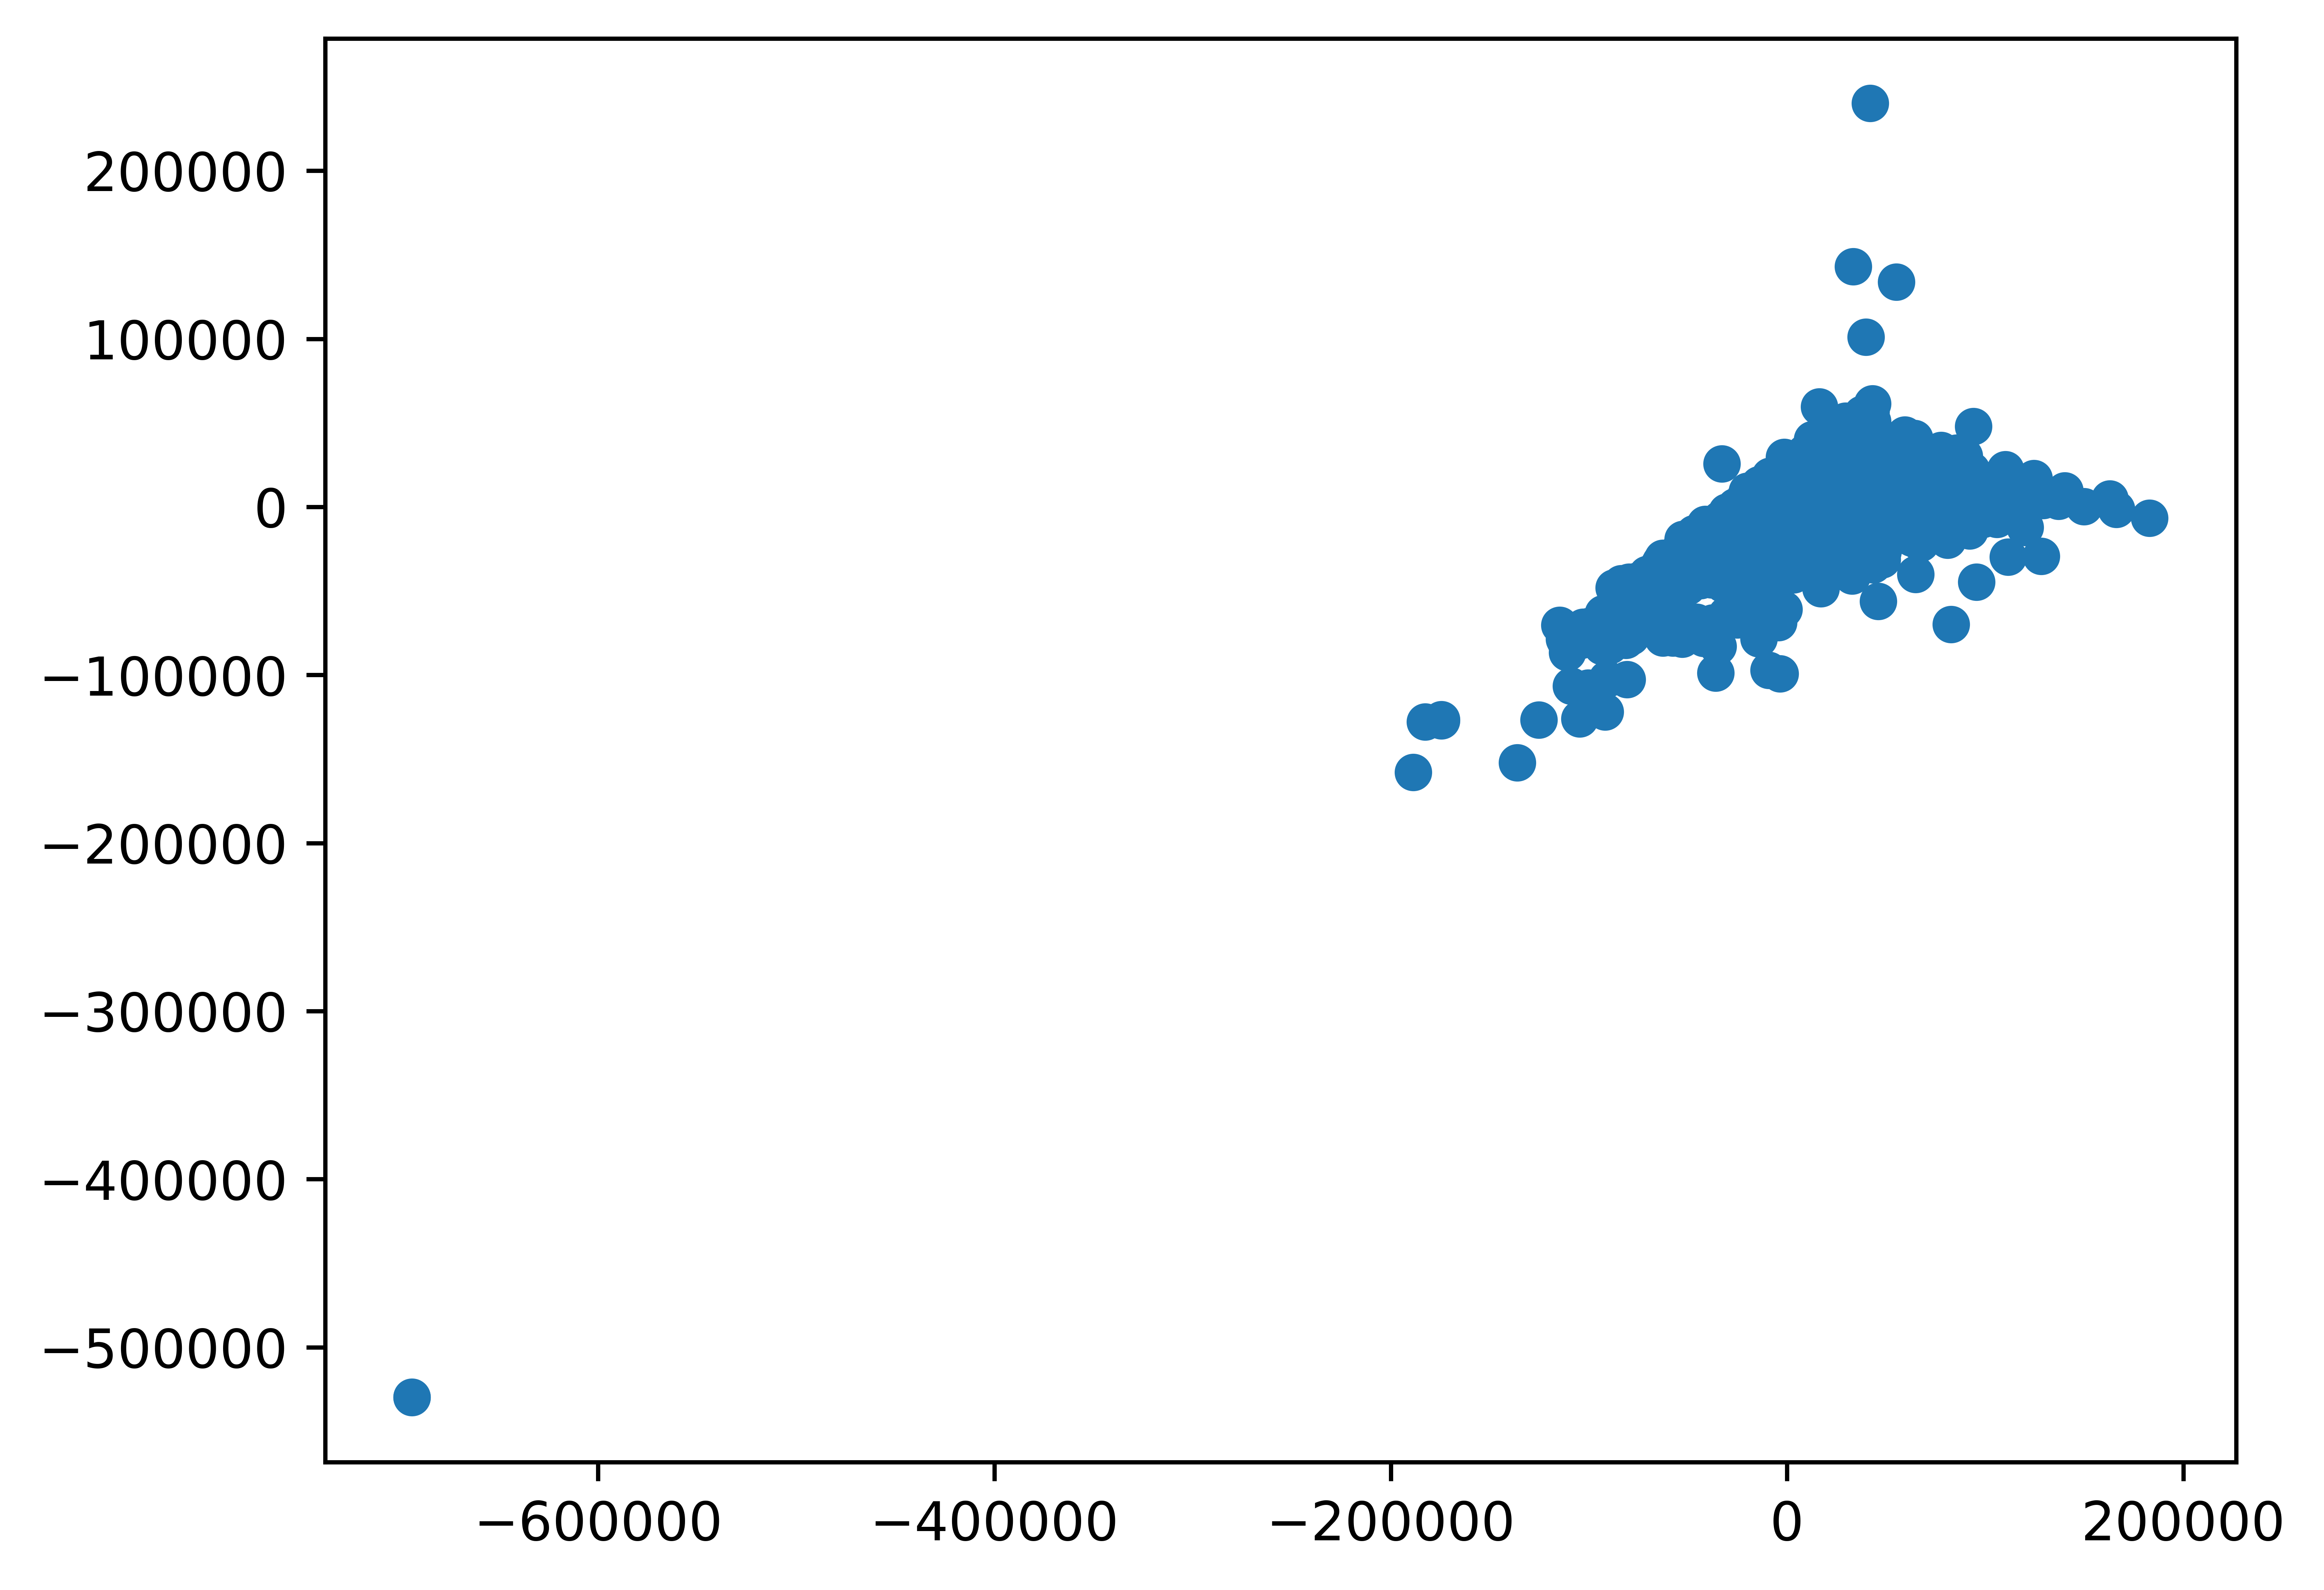

In [78]:
# Buid up the regression model (Linear Regression)
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib
import matplotlib.pyplot as plt


reg = LinearRegression(n_jobs=1)
reg.fit(X2_train, y_train)
predictions = reg.predict(X2_test)
print("Score: ", reg.score(X2_test, y_test))
plt.figure(dpi=1000)
plt.scatter(y_test, predictions)

# scores
print("MAE: ", mean_absolute_error(y_test, predictions))
print("MSE: ", mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))

In [79]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [80]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
reg.get_params()
model = LinearRegression()
param_grid = {'copy_X':[True, False],'fit_intercept': [True, False], 'n_jobs': [1, 5, 10, 15, 20, 25, None], 'positive': [True, False]}
random_s = RandomizedSearchCV(model, param_grid, n_iter = 100, cv=5)
random_s.fit(X2_train, y_train)
print("Best para: ", random_s.best_params_)
print("Best score: ", random_s.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 56 is smaller than n_iter=100. Running 56 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best para:  {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best score:  0.46789892806638755


In [81]:
# Export the dataset
# df_merged_clean.to_csv("final_data.csv",index=False)